In [ ]:
import pandas as pd
import numpy as np
import pandas
import numpy
import math
import warnings
import time
import matplotlib.pyplot as plt

from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import roc_curve, auc, accuracy_score,roc_auc_score,mean_absolute_error,r2_score

from scipy import stats
import pickle

warnings.filterwarnings('ignore')

In [ ]:
import h5py as h5
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Embedding, Dropout, Activation, Reshape
#from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, GlobalAveragePooling1D, TimeDistributed
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
#dataset = pd.read_csv('sample_data/data_CKD_MI.csv')

In [ ]:
dataset = pd.read_csv('sample_data/data_CKD_bigdata_refined.csv')
print(dataset.shape)
df = dataset.dropna()
print(df.shape)
df.describe()


(1000000, 29)
(1000000, 29)


,sex,age,sido,height,weight,waist,vision_left,vision_right,listen_left,listen_right,...,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_RSPS_CD,DRINK_OR_NOT,MOUTH_CHECK,BMI,GFR,stage
count,1000000.000000,1000000.000000,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1.469590,52.635205,33.694584,162.22823,63.268710,81.230185,0.980466,0.978019,1.031707,1.030689,...,0.862169,25.994604,25.750859,37.184051,1.607675,0.499248,0.400523,23.914610,92.440625,1.566124
std,0.499075,14.205915,12.672969,9.28462,12.520732,11.837045,0.608758,0.607068,0.175200,0.172455,...,0.498426,23.587013,26.335240,50.623388,0.818417,0.499898,0.490005,3.516791,31.420343,0.580398
min,1.000000,25.000000,11.000000,130.00000,25.000000,8.000000,0.100000,0.100000,0.958226,0.956816,...,0.100000,-1.716939,1.000000,1.000000,0.813515,-0.113279,0.000000,12.486993,0.317448,1.000000
25%,1.000000,40.000000,27.000000,155.00000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,...,0.700000,19.000000,15.000000,16.000000,1.000000,0.000000,0.000000,21.484375,77.123612,1.000000
50%,1.000000,50.000000,41.000000,160.00000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,...,0.800000,23.000000,20.000000,23.000000,1.000000,0.000000,0.000000,23.875115,89.324053,2.000000
75%,2.000000,65.000000,43.000000,170.00000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,...,1.000000,28.000000,29.000000,39.000000,2.000000,1.000000,1.000000,25.951557,103.940178,2.000000
max,2.000000,90.000000,50.000000,190.00000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,...,98.000000,9999.000000,7210.000000,999.000000,3.000000,1.432356,1.000000,45.714286,1353.095368,5.000000


In [ ]:
# dataset = dataset.head()
# dataset

In [ ]:
dataset.shape

(1000000, 29)

In [ ]:
dataset.isnull().sum()

sex                      0
age                      0
sido                     0
height                   0
weight                   0
waist                    0
vision_left              0
vision_right             0
listen_left              0
listen_right             0
BP_HIGH                  0
BP_LWST                  0
BLDS                     0
TOT_CHOLE                0
TRIGLYCERIDE             0
HDL_CHOLE                0
LDL_CHOLE                0
HMG                      0
OLIG_PROTE_CD            0
CREATININE               0
SGOT_AST                 0
SGPT_ALT                 0
GAMMA_GTP                0
SMK_STAT_TYPE_RSPS_CD    0
DRINK_OR_NOT             0
MOUTH_CHECK              0
BMI                      0
GFR                      0
stage                    0
dtype: int64

In [ ]:
# dataset = dataset[dataset[ 'CREATININE ']<=15]


In [ ]:
# dataset = dataset[dataset]

In [ ]:
dataset = dataset.head(50000)
dataset

,sex,age,sido,height,weight,waist,vision_left,vision_right,listen_left,listen_right,...,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_RSPS_CD,DRINK_OR_NOT,MOUTH_CHECK,BMI,GFR,stage
0,1,40,43,170,75,90.0,1.0,1.0,1.0,1.0,...,1.0,21.0,35.0,40.0,1.0,1.0,1,25.951557,86.886038,2
1,1,35,11,180,80,89.0,0.9,1.2,1.0,1.0,...,0.9,20.0,36.0,27.0,3.0,0.0,1,24.691358,100.644197,1
2,1,45,41,165,75,91.0,1.2,1.5,1.0,1.0,...,0.9,47.0,32.0,68.0,1.0,0.0,0,27.548209,95.928640,1
3,1,55,48,175,80,91.0,1.5,1.2,1.0,1.0,...,1.1,29.0,34.0,18.0,1.0,0.0,1,26.122449,73.203730,2
4,1,55,30,165,60,80.0,1.0,1.2,1.0,1.0,...,0.8,19.0,12.0,25.0,1.0,0.0,1,22.038567,105.714492,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,50,41,175,85,95.0,1.2,1.0,1.0,1.0,...,0.8,24.0,29.0,74.0,3.0,1.0,1,27.755102,107.684888,1
49996,1,65,41,170,70,79.0,0.7,0.7,1.0,1.0,...,1.1,24.0,20.0,24.0,2.0,0.0,0,24.221453,70.859343,2
49997,1,60,41,165,50,74.0,1.0,1.2,1.0,1.0,...,0.9,34.0,40.0,29.0,3.0,0.0,0,18.365473,90.730529,1
49998,2,50,31,155,50,75.0,1.0,1.0,1.0,1.0,...,0.6,20.0,25.0,15.0,1.0,1.0,0,20.811655,111.362243,1


In [ ]:
dataset.shape

(50000, 29)

In [ ]:
#dataset.iloc[:,:-1]

In [ ]:
#dataset.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import keras.layers
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
#smote = SMOTE('minority')
# # Data preprocessing
# X = dataset.iloc[:,:-1].values
# y = dataset.iloc[:,-1].values
# print(X.shape)
# print(y.shape)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.transform(X_test)
# X_train,y_train = smote.fit_resample(X_train,y_train)
# print(X_train.shape,y_train.shape)
# y_train = to_categorical(y_train,dtype="uint8")
# print(y_train.shape)
# y_test = to_categorical(y_test,dtype ="uint8")
# print(y_test.shape)

# print(X_train.shape)
# print(X_test.shape)

In [ ]:
# dataset = dataset.head(961570)
# dataset

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn import metrics
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from collections import Counter
#Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

#X = scaler.fit_transform(X)

In [ ]:
from imblearn.over_sampling import SMOTE

counter = Counter(y)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_sm, y_sm = smt.fit_resample(X, y)

counter = Counter(y_sm)
print('After',counter)

Before Counter({2: 24239, 1: 23838, 3: 1829, 5: 52, 4: 42})
After Counter({2: 24239, 1: 24239, 3: 24239, 5: 24239, 4: 24239})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.2, random_state = 2)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
xg_reg = XGBRegressor()
xg_reg.fit(X_train, y_train )
y_train_hat = xg_reg.predict(X_train)
train_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_hat)
train_rmse = np.sqrt(mean_squared_error(y_train , y_train_hat))
print ('R2: ',train_r2)
print ('RMSE: ', train_rmse)

[23:29:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2:  0.99946458313192
RMSE:  0.032692248459682285


In [ ]:
# from imblearn.combine import SMOTEENN
# counter = Counter(y)
# print('Before',counter)
# # oversampling the train dataset using SMOTE + ENN
# smenn = SMOTEENN()
# X_smenn, y_smenn = smenn.fit_resample(X,y)
# counter = Counter(y_smenn)
# print('After',counter)

In [ ]:
#X_train,X_test,y_train,y_test=train_test_split(X_smenn, y_smenn, train_size=0.8, stratify = y_smenn, random_state=100)

In [ ]:
print(X_train.shape,y_train.shape)
y_train = to_categorical(y_train,dtype="uint8")
print(y_train.shape)
y_test = to_categorical(y_test,dtype ="uint8")
print(y_test.shape)


(96956, 28) (96956,)
(96956, 6)
(24239, 6)


In [ ]:
# # ### ANN only
# import time
# start_time = time.time()
# #build the model
# # sequential
# #3 layers firtst 2 nurons and relu function
# #output layer 10 nuron softmax function
# model = Sequential()
# model.add(keras.layers.Dense (128,input_shape=(X_train.shape[1],),activation='relu')) #input layer
# model.add(keras.layers.Dense (64,activation='relu')) #hidden
# model.add(Dropout(.3))
# model.add(keras.layers.Dense (32,activation='relu')) #hidden
# model.add(Dropout(.3))
# model.add(keras.layers.Dense (5,activation='sigmoid')) #output
# model.compile(
#     optimizer = Adam(lr=0.001),
#     loss = 'mse',
#     metrics = ['accuracy']
# )
# history = model.fit(X_train, y_train, epochs=200,batch_size = 2096, validation_data=(X_test, y_test))
# print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
# y_prob = model.predict(X_test)
# print(y_prob)
# y_classes = y_prob.argmax(axis=-1)
# print(y_classes)

In [ ]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# y_classes_1=y_test.argmax(axis=-1)
# mat = confusion_matrix(y_classes_1,y_classes)
# print(mat)
# pl= ConfusionMatrixDisplay(mat,display_labels=range(5))
# # pl.plot()
# # plt.show()

In [ ]:
# from sklearn.metrics import accuracy_score
# print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_classes_1,y_classes)))

In [ ]:
# from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# print(precision_score(y_classes_1,y_classes,average='micro'))
# print(recall_score(y_classes_1,y_classes,average="micro"))
# print(f1_score(y_classes_1,y_classes,average="micro"))

In [ ]:
# from sklearn.metrics import classification_report
# print('\nClassification Report\n')
# print(classification_report(y_classes_1,y_classes, target_names=['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5']))

In [ ]:
# target_names=['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5']

In [ ]:
# import seaborn as sn
# import pandas as pd 
# fig = plt.subplots(1,1, figsize = (10, 6))
# target_names=['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5']
# df_cm = pd.DataFrame(mat,target_names,target_names)
# sn.set(font_scale= 2)
# sn.heatmap(df_cm,annot=True,annot_kws={"size":10},cmap='Blues',fmt='g')
# plt.xlabel('Predictions',fontsize=22)
# plt.ylabel('Actual',fontsize=22)
# plt.xticks(fontsize =16)
# plt.yticks(fontsize =16)
# plt.savefig('ANN_ConfusionMatrix.png', dpi=300)
# # from mlxtend.plotting import plot_confusion_matrix
# # fig,ax = plot_confusion_matrix(conf_mat = mat,fontsize=20)
# # plt.xlabel('Predictions',fontsize=18)
# # plt.ylabel('Actual',fontsize=18)

In [ ]:
# from google.colab import files
# files.download('ANN_ConfusionMatrix.png')

In [ ]:
# import matplotlib.pyplot as plt
# fig = plt.gcf()
# plt.style.use('seaborn-white')
# #fig = plt.subplots(1,1, figsize = (12, 8))
# fig.set_size_inches(11,8, forward=True)
# # fig = plt.figure()
# plt.plot(history.history['loss'],'b')
# plt.plot(history.history['val_loss'],'r')
# plt.title('ANN',fontsize = 24)
# plt.xlabel('Epochs',fontsize =22)
# plt.ylabel('Loss',fontsize = 22)
# plt.xticks(fontsize =18)
# plt.yticks(fontsize =18)
# plt.legend(['loss', 'validation loss'], loc='upper right')
# plt.draw()
# plt.savefig('ANN.png', dpi=300)

In [ ]:
# from google.colab import files
# files.download('ANN.png') 

In [ ]:
# import matplotlib.pyplot as plt 
# from sklearn.preprocessing import LabelBinarizer
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# #plt.style.use('seaborn-white')

# target= ['Stage 1','Stage 2','Stage 3','Stage 4','Stage 5']

# # set plot figure size
# fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# # function for scoring roc auc score for multi-class
# def multiclass_roc_auc_score(y_classes_1, y_classes, average="macro"):
#     lb = LabelBinarizer()
#     lb.fit(y_classes_1)
#     y_test = lb.transform(y_classes_1)
#     y_pred = lb.transform(y_classes)

#     for (idx, c_label) in enumerate(target):
#         fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
#         c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
#     c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
#     return roc_auc_score(y_test, y_pred, average=average)
# print('ROC AUC score:', multiclass_roc_auc_score(y_classes_1, y_classes))
# c_ax.legend(fontsize=18,)
# #c_ax.legend()
# c_ax.set_xlabel('False Positive Rate',fontsize = 22)
# c_ax.set_ylabel('True Positive Rate',fontsize = 22)
# plt.title('ANN',fontsize = 24)
# plt.xticks(fontsize =18)
# plt.yticks(fontsize =18)
# plt.savefig('ANN_AUC.png', dpi=300)
# plt.show()

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print(X_train.shape)
print(X_test.shape)

(96956, 28, 1)
(24239, 28, 1)


In [ ]:
# # get the model SimpleRNN
from keras.layers import Dense, SimpleRNN
def evaluate_model_SimpleRNN(X_train, X_val, y_train, y_val):
  model = SimpleRNN
  timesteps=125
  dims=4
  model = Sequential()
  model.add(SimpleRNN(units=16, input_shape=(X_train.shape[1],1), activation="relu"))
  model.add(Dense(256, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(128, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(6, kernel_initializer='he_uniform'))
  model.compile(loss='mse', optimizer=Adam(lr = 0.001), metrics=['accuracy'])
  history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=200, batch_size=5096, verbose=1)
  return history, model
  

Epoch 1/200
20/20 [==============================] - 2s 51ms/step - loss: 0.1363 - accuracy: 0.2726 - val_loss: 0.1230 - val_accuracy: 0.3739
Epoch 2/200
20/20 [==============================] - 1s 41ms/step - loss: 0.1165 - accuracy: 0.3846 - val_loss: 0.1072 - val_accuracy: 0.4584
Epoch 3/200
20/20 [==============================] - 1s 41ms/step - loss: 0.0986 - accuracy: 0.5251 - val_loss: 0.0884 - val_accuracy: 0.6063
Epoch 4/200
20/20 [==============================] - 1s 42ms/step - loss: 0.0821 - accuracy: 0.7019 - val_loss: 0.0736 - val_accuracy: 0.7920
Epoch 5/200
20/20 [==============================] - 1s 42ms/step - loss: 0.0683 - accuracy: 0.8391 - val_loss: 0.0614 - val_accuracy: 0.8470
Epoch 6/200
20/20 [==============================] - 1s 42ms/step - loss: 0.0563 - accuracy: 0.8980 - val_loss: 0.0491 - val_accuracy: 0.9241
Epoch 7/200
20/20 [==============================] - 1s 44ms/step - loss: 0.0435 - accuracy: 0.9369 - val_loss: 0.0364 - val_accuracy: 0.9455
Epoch 

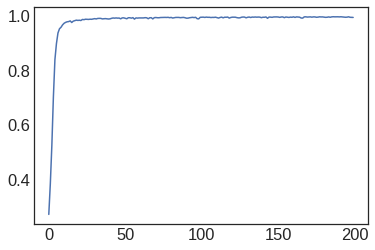

In [ ]:
n_folds = 1
cv_scores, model_history = list(), list()
model = tf.keras.Sequential()
history, model= evaluate_model_SimpleRNN(X_train, X_test, y_train, y_test)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])

In [ ]:
y_prob = model.predict(X_test)
print(y_prob)
y_classes = y_prob.argmax(axis=-1)
print(y_classes)

[[ 3.4414735e-03  9.0287292e-01  1.1563069e-01 -5.8066174e-02
   3.2639131e-04  1.4251856e-02]
 [-2.9249135e-03 -3.5539847e-02  4.9885537e-02  9.4333690e-01
   1.7242428e-02  1.3308575e-02]
 [ 6.3753184e-03  9.3842232e-01  8.4463775e-02 -4.2554423e-02
  -2.2001304e-03  1.1894850e-02]
 ...
 [ 2.6403125e-03 -2.1813136e-02  2.1365669e-02 -2.2571610e-02
   1.0071441e+00  5.6444239e-03]
 [ 3.5705622e-03 -2.4908762e-02  2.2509363e-02 -2.4868296e-02
   1.0054666e+00  1.0134188e-02]
 [-2.0519886e-03 -3.6421698e-02  1.0452058e+00 -4.5973822e-02
   2.8662644e-03  4.3079324e-02]]
[1 3 1 ... 4 4 2]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_classes_1=y_test.argmax(axis=-1)
mat = confusion_matrix(y_classes_1,y_classes)
print(mat)
pl= ConfusionMatrixDisplay(mat,display_labels=range(5))

[[4566  373    0    0    0]
 [   0 4779   48    0    0]
 [   0    0 4814    6    0]
 [   0    0    0 4782    0]
 [   2   41   41   13 4774]]


In [ ]:
import pandas as pd
FP = mat.sum(axis=0) - np.diag(mat) 
FN = mat.sum(axis=1) - np.diag(mat)
TP = np.diag(mat)
TN = mat.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
# print(TP)
# print(TN)
# print(FP)
# print(FN)
print(TPR)
print(FPR)
print(FNR)

[0.92447864 0.99005594 0.99875519 1.         0.98008622]
[0.00010363 0.02132701 0.00458314 0.00097651 0.        ]
[0.07552136 0.00994406 0.00124481 0.         0.01991378]


In [ ]:
table = pd.DataFrame({'TPR':TPR,'FPR':FPR,'FNR':FNR,'ACCURACY':ACC},index = ['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5'])
table.round(3)

,TPR,FPR,FNR,ACCURACY
Stage 1,0.924,0.000,0.076,0.985
Stage 2,0.990,0.021,0.010,0.981
Stage 3,0.999,0.005,0.001,0.996
Stage 4,1.000,0.001,0.000,0.999
Stage 5,0.980,0.000,0.020,0.996


In [ ]:
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_classes_1,y_classes)))


Accuracy: 0.98



In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(precision_score(y_classes_1,y_classes,average='micro'))
print(recall_score(y_classes_1,y_classes,average="micro"))
print(f1_score(y_classes_1,y_classes,average="micro"))

0.978381946449936
0.978381946449936
0.978381946449936


In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_classes_1,y_classes, target_names=['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5']))


Classification Report

              precision    recall  f1-score   support

     Stage 1       1.00      0.92      0.96      4939
     Stage 2       0.92      0.99      0.95      4827
     Stage 3       0.98      1.00      0.99      4820
     Stage 4       1.00      1.00      1.00      4782
     Stage 5       1.00      0.98      0.99      4871

    accuracy                           0.98     24239
   macro avg       0.98      0.98      0.98     24239
weighted avg       0.98      0.98      0.98     24239



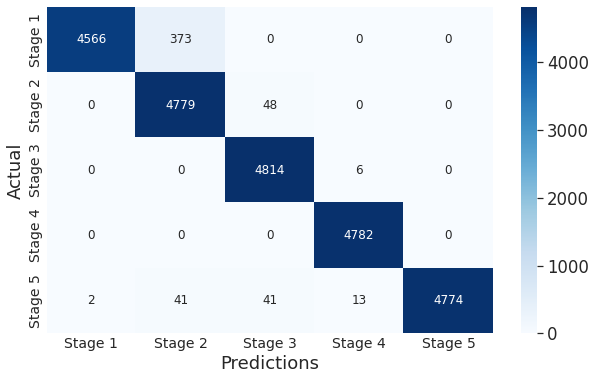

In [ ]:
import seaborn as sn
import pandas as pd 
fig = plt.subplots(1,1, figsize = (10, 6))
target_names=['Stage 1', 'Stage 2', 'Stage 3','Stage 4','Stage 5']
df_cm = pd.DataFrame(mat,target_names,target_names)
sn.set(font_scale= 1.5)
sn.heatmap(df_cm,annot=True,annot_kws={"size":12},cmap='Blues',fmt='g')
plt.xlabel('Predictions',fontsize=18)
plt.ylabel('Actual',fontsize=18)
plt.xticks(fontsize =14)
plt.yticks(fontsize =14)
plt.savefig('RNN-MLP_ConfusionMatrix.png', dpi=100)


In [ ]:
from google.colab import files
files.download('RNN-MLP_ConfusionMatrix.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

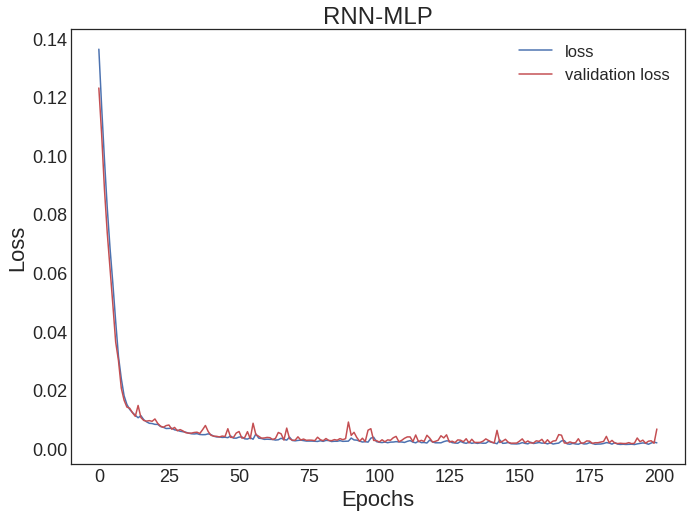

In [ ]:
import matplotlib.pyplot as plt
fig = plt.gcf()
plt.style.use('seaborn-white')
#fig = plt.subplots(1,1, figsize = (12, 8))
fig.set_size_inches(11,8, forward=True)
# fig = plt.figure()
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.title('RNN-MLP',fontsize = 24)
plt.xlabel('Epochs',fontsize =22)
plt.ylabel('Loss',fontsize = 22)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.draw()
plt.savefig('RNN-MLP.png', dpi=300)

In [ ]:
from google.colab import files
files.download('RNN-MLP.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ROC AUC score: 0.9866385692387099


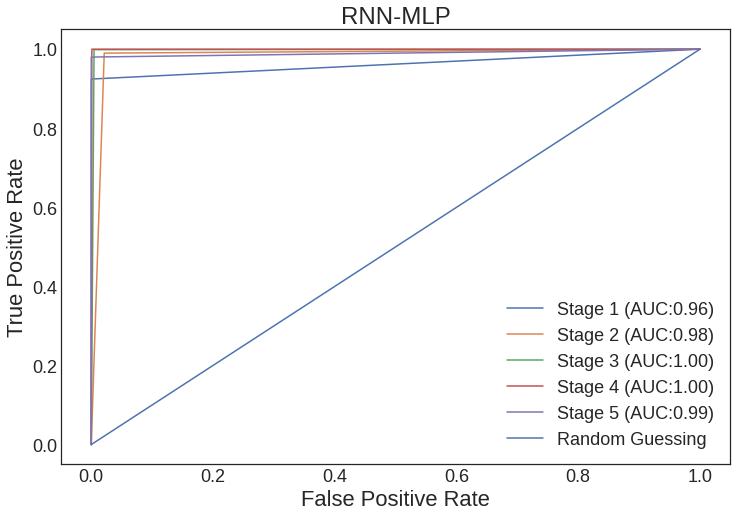

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
#plt.style.use('seaborn-white')

target= ['Stage 1','Stage 2','Stage 3','Stage 4','Stage 5']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_classes_1, y_classes, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_classes_1)
    y_test = lb.transform(y_classes_1)
    y_pred = lb.transform(y_classes)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)
print('ROC AUC score:', multiclass_roc_auc_score(y_classes_1, y_classes))
c_ax.legend(fontsize=18,)
#c_ax.legend()
c_ax.set_xlabel('False Positive Rate',fontsize = 22)
c_ax.set_ylabel('True Positive Rate',fontsize = 22)
plt.title('RNN-MLP',fontsize = 24)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.savefig('RNN-MLP_AUC.png', dpi=300)
plt.show()

In [ ]:
from google.colab import files
files.download('RNN-MLP_AUC.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>